In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Load the data
df = pd.read_csv(r"C:\Users\sreek\OneDrive\Desktop\ACM\creditcard.csv.zip")

# Separate features and labels
X = df.drop(columns=["Class", "Time"])
y = df["Class"]

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Optional: Downsample to balance the dataset for faster training
fraud = df[df["Class"] == 1]
non_fraud = df[df["Class"] == 0].sample(n=5000, random_state=42)
balanced_df = pd.concat([fraud, non_fraud])

X_bal = balanced_df.drop(columns=["Class", "Time"])
y_bal = balanced_df["Class"]
X_bal_scaled = scaler.fit_transform(X_bal)


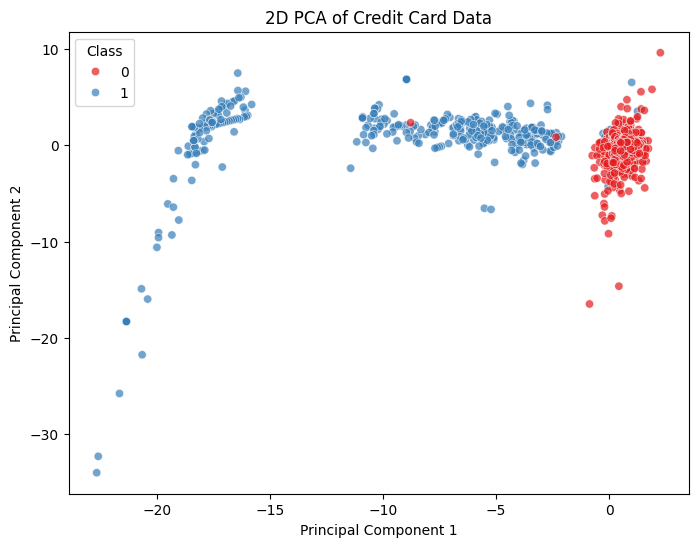

In [4]:
# PCA to 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_bal_scaled)

# Plot PCA result
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y_bal, palette="Set1", alpha=0.7)
plt.title("2D PCA of Credit Card Data")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()


In [5]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X_bal_scaled, y_bal, test_size=0.3, random_state=42, stratify=y_bal)

# Define SVM classifiers
svm_linear = SVC(kernel='linear')
svm_rbf = SVC(kernel='rbf')
svm_poly = SVC(kernel='poly', degree=3)

# Train models
svm_linear.fit(X_train, y_train)
svm_rbf.fit(X_train, y_train)
svm_poly.fit(X_train, y_train)


,C,1.0
,kernel,'poly'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [6]:
# Evaluation helper function
def evaluate(model, name):
    y_pred = model.predict(X_test)
    print(f"\n{name} Kernel")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred, zero_division=0))

# Evaluate all kernels
evaluate(svm_linear, "Linear")
evaluate(svm_rbf, "RBF")
evaluate(svm_poly, "Polynomial")



Linear Kernel
Accuracy: 0.9811893203883495
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1500
           1       0.97      0.82      0.89       148

    accuracy                           0.98      1648
   macro avg       0.98      0.91      0.94      1648
weighted avg       0.98      0.98      0.98      1648


RBF Kernel
Accuracy: 0.9824029126213593
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1500
           1       0.98      0.82      0.89       148

    accuracy                           0.98      1648
   macro avg       0.98      0.91      0.94      1648
weighted avg       0.98      0.98      0.98      1648


Polynomial Kernel
Accuracy: 0.9757281553398058
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1500
           1       0.97      0.76      0.85       148

    accuracy                           0.98      